(<Figure size 1400x1000 with 2 Axes>,
          연령별     2020     2025
 0     0 - 4세  1776616  1219810
 1     5 - 9세  2278285  1766989
 2   10 - 14세  2250969  2271667
 3   15 - 19세  2518218  2267007
 4   20 - 24세  3392351  2660295
 5   25 - 29세  3645542  3476469
 6   30 - 34세  3307803  3670087
 7   35 - 39세  3866979  3305481
 8   40 - 44세  3872171  3851246
 9   45 - 49세  4385732  3865770
 10  50 - 54세  4338269  4367799
 11  55 - 59세  4237067  4292571
 12  60 - 64세  3814370  4155466
 13  65 - 69세  2662232  3688605
 14  70 - 74세  1990347  2527085
 15  75 - 79세  1608464  1820534
 16     80세이상  1890824  2477683
 17   100세 이상     5353     7629)

C:\Users\taehyeon\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\taehyeon\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\taehyeon\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\taehyeon\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\taehyeon\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  func(*arg

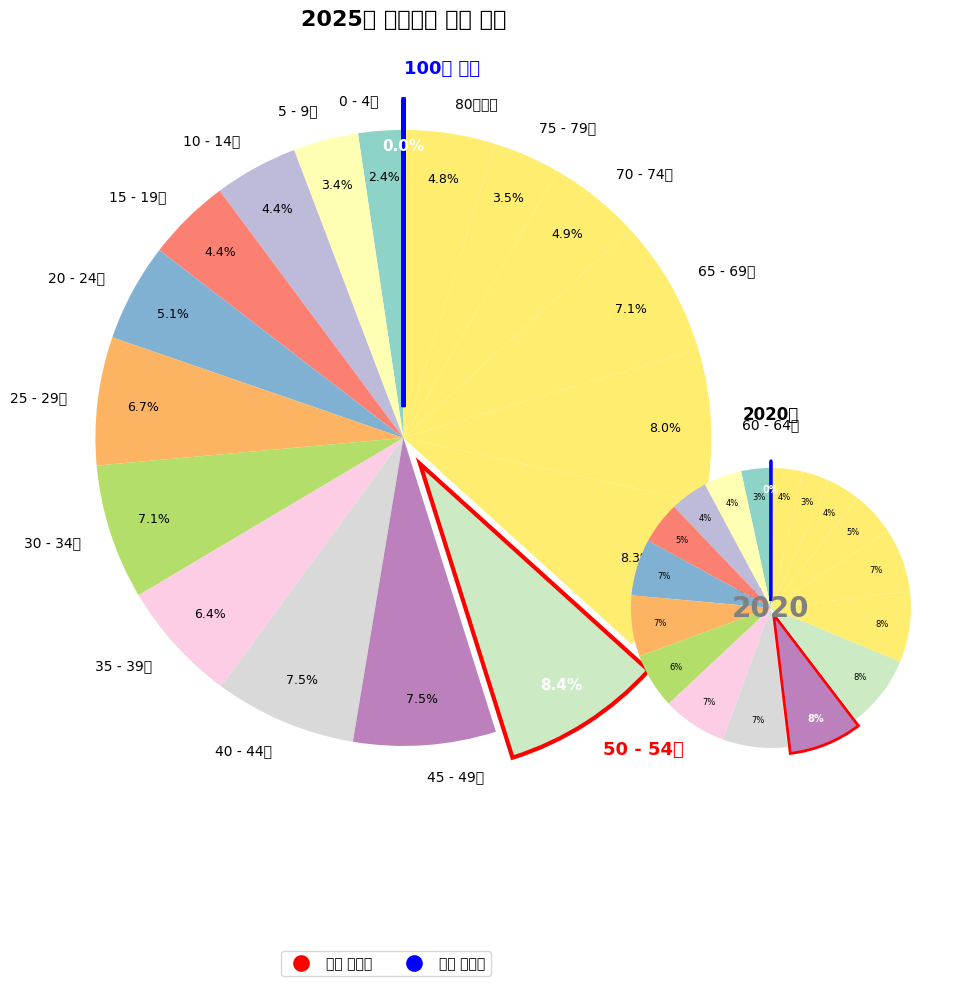

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def graph_population_age() : #연령에 따른 파이 그래프 (2025 크게, 2020 작게 오른쪽 아래에)
    data = pd.read_csv("C:/Users/taehyeon/Desktop/2025-2/전공/데이터시각화/Project/연령.csv", encoding = "cp949")

    # Figure 생성
    fig = plt.figure(figsize=(14, 10))
    
    colors = plt.cm.Set3(range(len(data)))
    
    # ====== 메인 차트 (2025년) - 전체 영역 사용 ======
    ax1 = fig.add_subplot(111)
    
    max_age_2025 = data["2025"].argmax()
    min_age_2025 = data["2025"].argmin()
    
    explode_2025 = [0] * len(data)
    explode_2025[max_age_2025] = 0.1
    explode_2025[min_age_2025] = 0.1
    
    wedges1, texts1, autotexts1 = ax1.pie(
        data["2025"].values, 
        labels=data["연령별"].values,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode_2025,
        textprops={'fontsize': 10},
        pctdistance=0.85
    )
    
    # 2025년 하이라이트
    for i, (wedge, text, autotext) in enumerate(zip(wedges1, texts1, autotexts1)):
        if i == max_age_2025:
            wedge.set_edgecolor('red')
            wedge.set_linewidth(3)
            text.set_fontsize(13)
            text.set_fontweight('bold')
            text.set_color('red')
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(11)
        elif i == min_age_2025:
            wedge.set_edgecolor('blue')
            wedge.set_linewidth(3)
            text.set_fontsize(13)
            text.set_fontweight('bold')
            text.set_color('blue')
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(11)
        else:
            autotext.set_fontsize(9)
    
    ax1.set_title('2025년 연령대별 인구 비율', fontsize=16, fontweight='bold', pad=20)
    
    # ====== 서브 차트 (2020년) - 오른쪽 아래 작게 ======
    # [left, bottom, width, height] 형식으로 위치와 크기 지정
    ax2 = fig.add_axes([0.6, 0.15, 0.35, 0.35])  # 오른쪽 아래에 작은 원
    
    max_age_2020 = data["2020"].argmax()
    min_age_2020 = data["2020"].argmin()
    
    explode_2020 = [0] * len(data)
    explode_2020[max_age_2020] = 0.05
    explode_2020[min_age_2020] = 0.05
    
    wedges2, texts2, autotexts2 = ax2.pie(
        data["2020"].values, 
        labels=None,  # 작은 차트에는 레이블 제거
        autopct='%1.0f%%',  # 소수점 줄임
        startangle=90,
        colors=colors,
        explode=explode_2020,
        textprops={'fontsize': 7},
        pctdistance=0.8
    )
    
    # 2020년 하이라이트
    for i, (wedge, autotext) in enumerate(zip(wedges2, autotexts2)):
        if i == max_age_2020:
            wedge.set_edgecolor('red')
            wedge.set_linewidth(2)
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        elif i == min_age_2020:
            wedge.set_edgecolor('blue')
            wedge.set_linewidth(2)
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        else:
            autotext.set_fontsize(6)
    
    ax2.set_title('2020년', fontsize=12, fontweight='bold', pad=10)
    
    # 범례 (전체 하단에)
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                markersize=10, markeredgecolor='red', markeredgewidth=2,
                label='최다 연령대'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
                markersize=10, markeredgecolor='blue', markeredgewidth=2,
                label='최소 연령대')
    ]
    fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), 
               fontsize=10, ncol=2)
    ax2.set_facecolor('white')
    ax2.patch.set_alpha(0.9)

    # 작은 차트에 테두리 추가
    for spine in ax2.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(2)

    # 2020년 텍스트를 파이 중앙에 표시
    ax2.text(0, 0, '2020', ha='center', va='center', 
            fontsize=20, fontweight='bold', color='gray')
    return fig, data
graph_population_age()